<a href="https://colab.research.google.com/github/SiddheshP1996/ML-Projects-And-Case-Study/blob/main/ML_Project_%3E_CaseStudy_on_CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**End-To-End ML Project**

**[Q] Task work** -> You have to work on credit card data and apply all the things taught in our course.

Example: EDA, Model Application and all the things.

And lastly you have to **draw confusion matrix** and **roc curve** and also calculate **auc score** and **maximise the accuracy** of your models in whatever way you want.

Also, You have to **add proper comments** so that your Code is understandable.

**Conclude** the Case Study overall at the end.

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# library to import content from drive to google colab
from google.colab import drive

In [ ]:
drive.mount('/content/drive')  # to mount the drive

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CreditCardCaseStudy/creditcardfraud.csv')

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.shape

(555719, 23)

In [ ]:
df.size

12781537

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
# seperating the is_fraud feature column from other feature columns
X = df.drop('is_fraud', axis=1)
Y = df['is_fraud']

In [ ]:
X.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

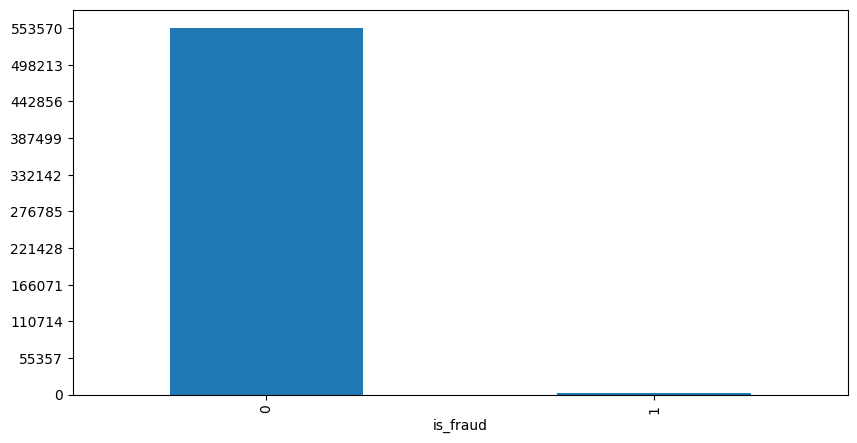

In [ ]:
# bar plot for the category feature
plt.figure(figsize=(10, 5))
value_Counts = df['is_fraud'].value_counts()
value_Counts.plot(kind='bar')
plt.yticks(range(0, value_Counts.max() + 1, value_Counts.max() // 10))
plt.show()
# add yticks

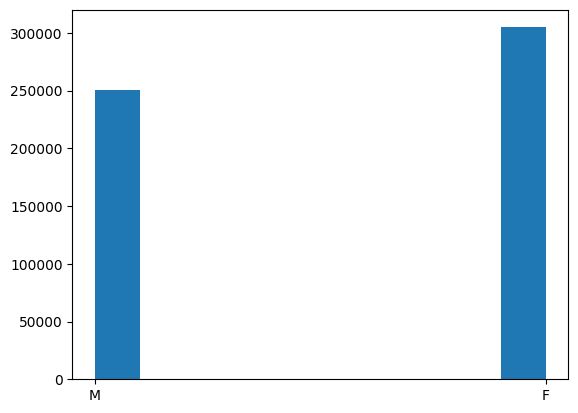

<Figure size 1500x500 with 0 Axes>

In [ ]:
# histogram for gender feature
plt.hist(df['gender'])
plt.figure(figsize=(15, 5))
plt.show()

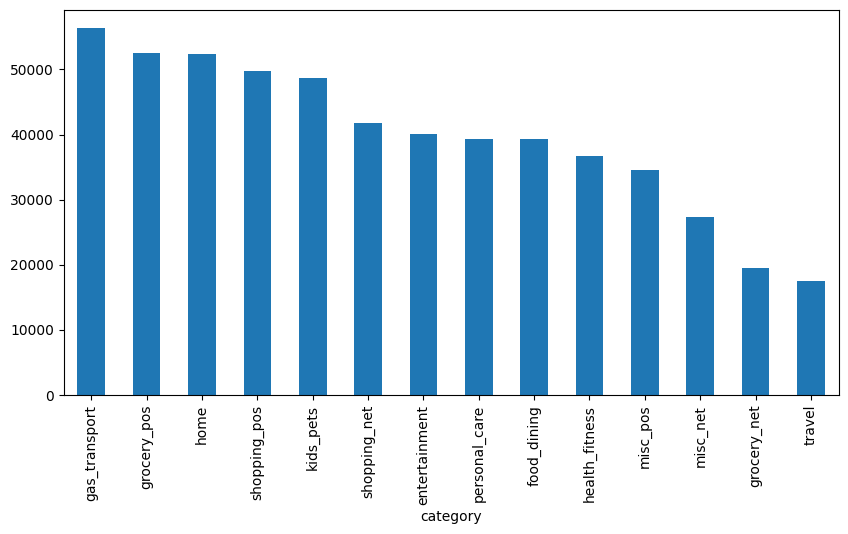

In [ ]:
# bar plot for the category feature
plt.figure(figsize=(10, 5))
df['category'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
fraudByCategory = df[df['is_fraud']==1]['category'].value_counts()
fraudByCategory

category
shopping_net      506
grocery_pos       485
misc_net          267
shopping_pos      213
gas_transport     154
misc_pos           72
personal_care      70
home               67
kids_pets          65
entertainment      59
food_dining        54
health_fitness     52
grocery_net        41
travel             40
Name: count, dtype: int64

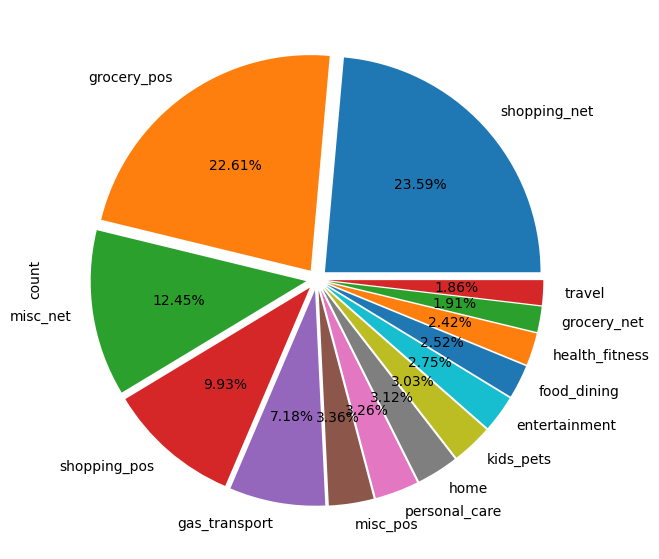

In [ ]:
# pie plot for the category feature
explode = [0.05] * 14
plt.figure(figsize=(15, 7))
fraudByCategory.plot(kind="pie", autopct='%.2f%%', explode=explode)
plt.show()

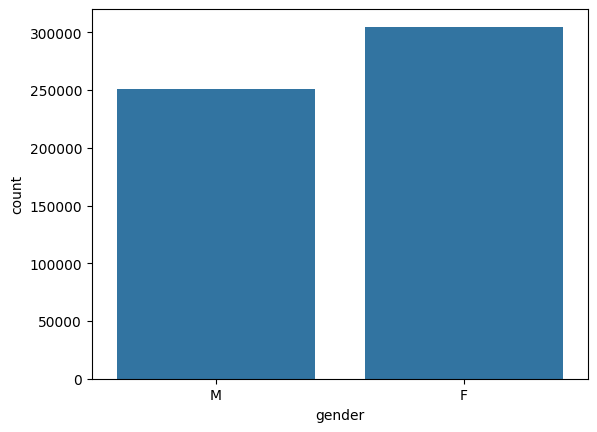

In [ ]:
# countplot for the gender feature
sns.countplot(x=df['gender'])
plt.show()

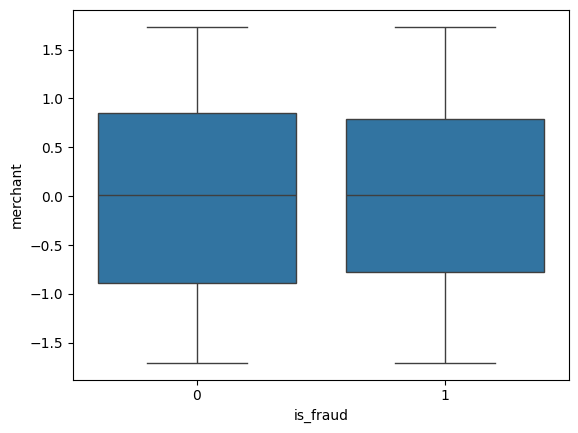

In [ ]:
# boxplot for merchant feature
sns.boxplot(data=X, x = Y, y = 'merchant')
plt.show()

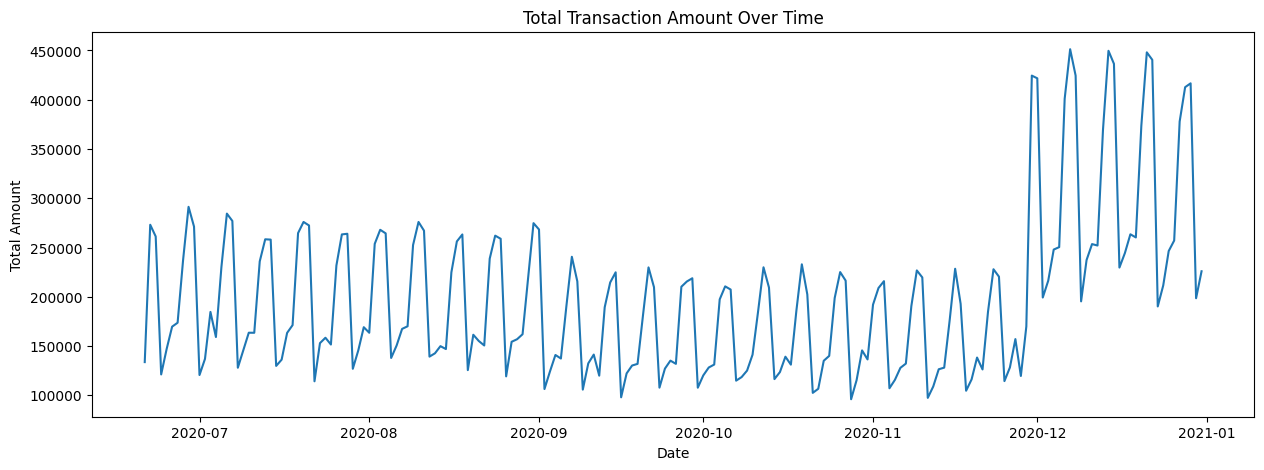

In [ ]:
# line graph
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
dailyAmount = df.groupby(df['trans_date_trans_time'].dt.date)['amt'].sum()

plt.figure(figsize=(15, 5))
plt.plot(dailyAmount.index, dailyAmount.values)
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
# checking the assymetry of the data with skewness
from scipy.stats import skew

In [ ]:
# applying the skewness for the numeric columns
num_col = X.select_dtypes(['int64','float64']).columns
num_col

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long'],
      dtype='object')

Unnamed: 0
-1.2068617714962222e-15


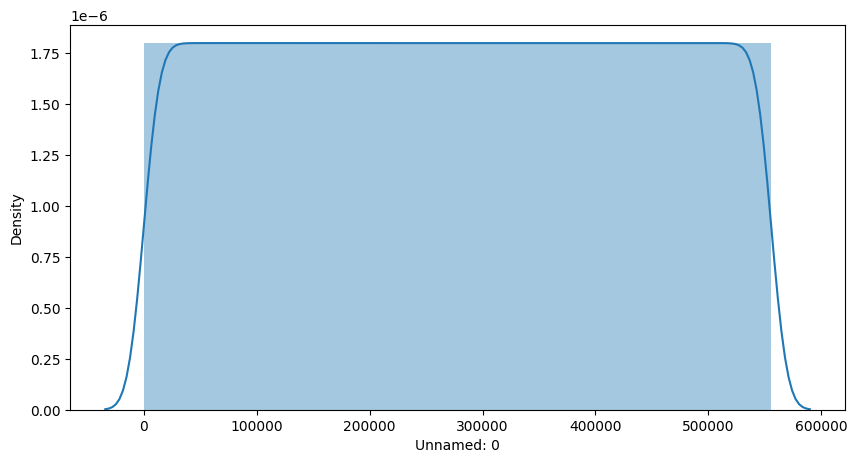

cc_num
2.849196125801376


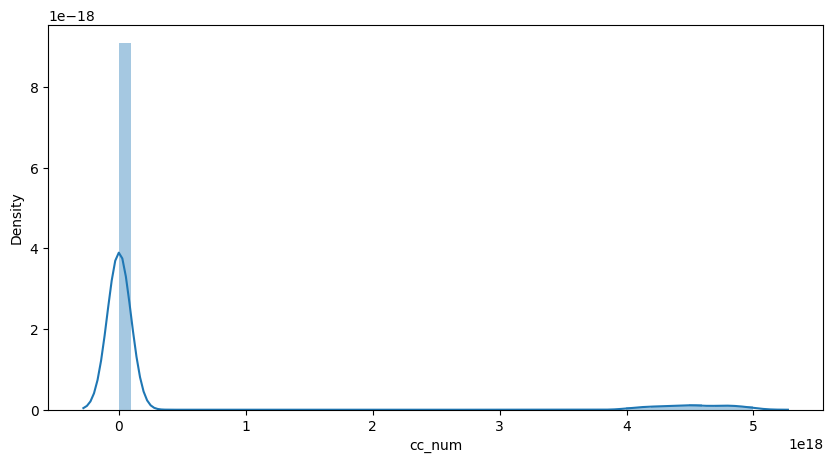

amt
37.133976607824614


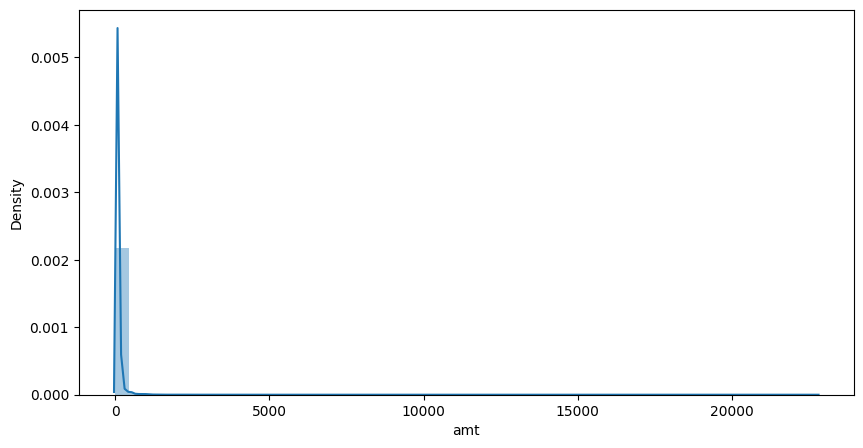

zip
0.07724580089350411


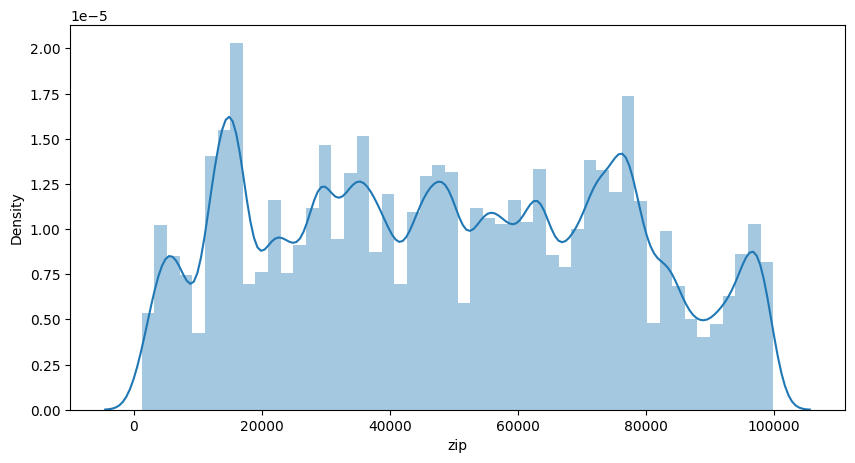

lat
-0.20603708850877414


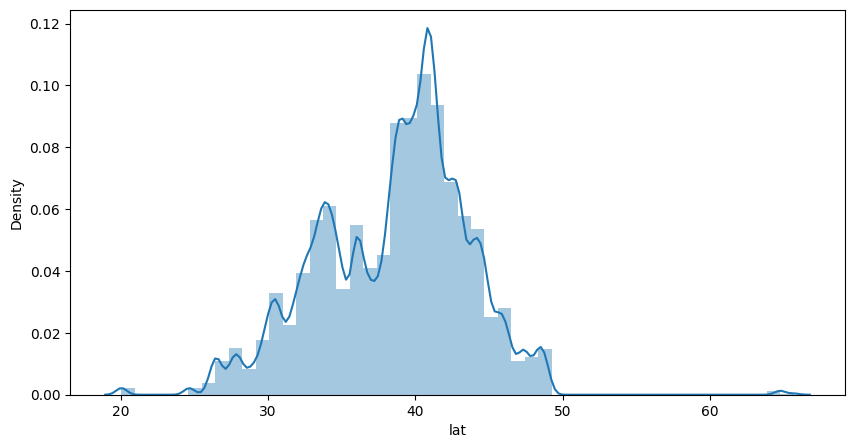

long
-1.139412668729779


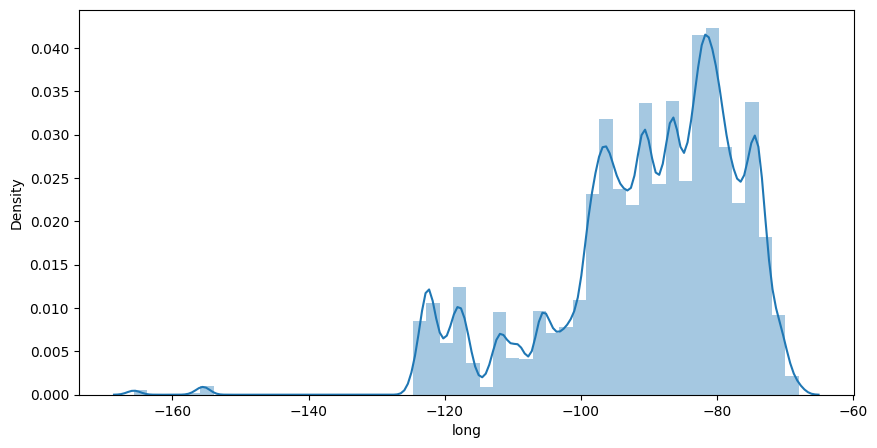

city_pop
5.583399535513833


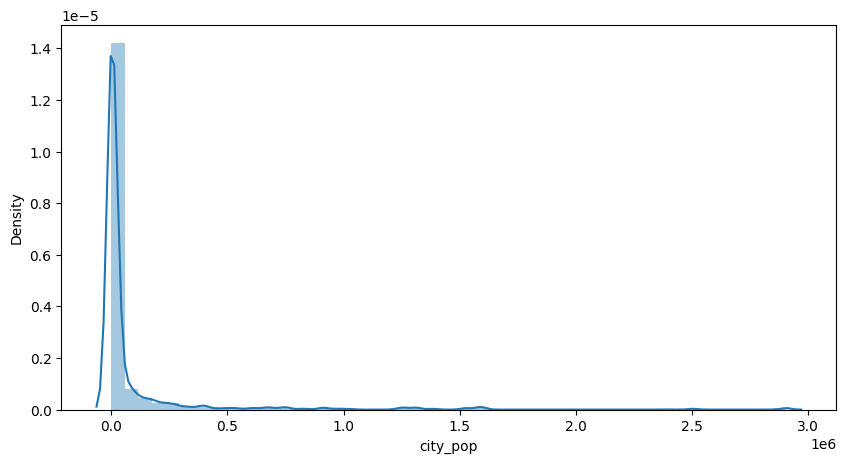

unix_time
-0.07740517174384152


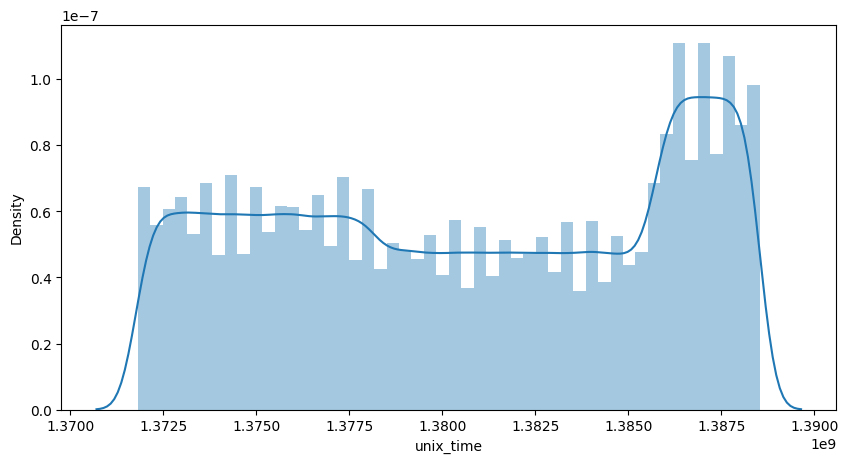

merch_lat
-0.20262555977325764


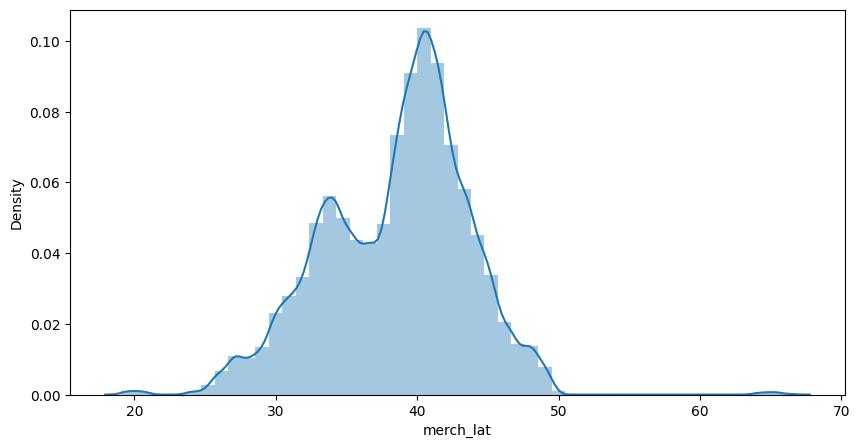

merch_long
-1.1368064787793306


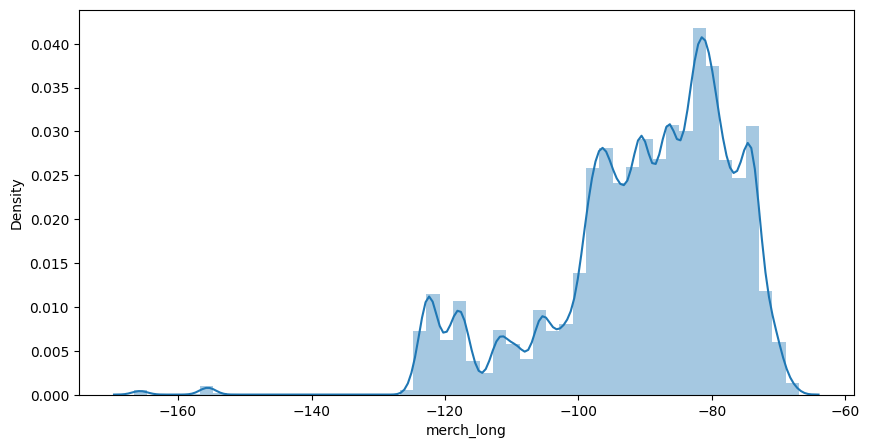

In [ ]:
# Below for loop is used to plot the skewness for the numeric feature columns to check the assymetry of the data
# plotted skewness with the use of distplot
for c in X[num_col]:
  print(c)
  print(skew(X[c]))
  plt.figure(figsize=(10, 5))
  sns.distplot(X[c])
  plt.show()

In [ ]:
cat_col = X.select_dtypes(['object']).columns
cat_col

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [ ]:
# Here we are encoding the data from categorical data to encoder data
# importing and initilizing Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [ ]:
# Encoding the data using fit_transform
X[cat_col] = oe.fit_transform(X[cat_col])

In [ ]:
X.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,0.0,2291163933867244,319.0,10.0,2.86,151.0,115.0,1.0,341.0,...,29209,33.9659,-80.9355,333497,275.0,376.0,98699.0,1371816865,33.986391,-81.200714
1,1,1.0,3573030041201292,591.0,10.0,29.84,163.0,457.0,0.0,354.0,...,84002,40.3207,-110.4360,302,392.0,760.0,108785.0,1371816873,39.450498,-109.960431
2,2,2.0,3598215285024754,611.0,5.0,41.28,24.0,249.0,0.0,865.0,...,11710,40.6729,-73.5365,34496,259.0,421.0,433979.0,1371816893,40.495810,-74.196111
3,3,3.0,3591919803438423,222.0,9.0,60.05,42.0,457.0,1.0,320.0,...,32780,28.5697,-80.8191,54767,407.0,718.0,71993.0,1371816915,28.812398,-80.883061
4,4,4.0,3526826139003047,292.0,13.0,3.19,247.0,261.0,1.0,548.0,...,49632,44.2529,-85.0170,1126,196.0,177.0,190585.0,1371816917,44.959148,-85.884734


In [ ]:
cat_col = X.select_dtypes(['object']).columns
cat_col

Index([], dtype='object')

In [ ]:
# Scaling the data
# importing and initializing Standard Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
# using fit_transform using standard scalar and iloc function
X.iloc[:,:] = ss.fit_transform(X.iloc[:,:])

In [ ]:
X.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,-1.732048,-1.732669,-0.317252,-0.119663,0.961683,-0.424463,-0.232273,-0.994479,1.102494,-0.450296,...,-0.731091,-0.904377,0.677451,0.816521,0.243860,-0.461769,-1.116803,-1.703871,-0.894145,0.657586
1,-1.732041,-1.732663,-0.316273,1.231656,0.961683,-0.252337,-0.106449,1.568286,-0.907034,-0.401053,...,1.309217,0.351182,-1.472454,-0.292685,1.102086,1.033750,-1.053931,-1.703869,0.178126,-1.436610
2,-1.732035,-1.732656,-0.316254,1.331017,-0.316151,-0.179353,-1.563901,0.009646,-0.907034,1.534597,...,-1.382695,0.420768,1.216667,-0.178853,0.126496,-0.286513,0.973182,-1.703865,0.383257,1.167640
3,-1.732029,-1.732650,-0.316259,-0.601568,0.706116,-0.059605,-1.375166,1.568286,1.102494,-0.529843,...,-0.598119,-1.970539,0.685934,-0.111371,1.212115,0.870177,-1.283276,-1.703861,-1.909485,0.680717
4,-1.732023,-1.732644,-0.316308,-0.253802,1.728384,-0.422358,0.774312,0.099567,1.102494,0.333812,...,0.029394,1.128092,0.380004,-0.289942,-0.335625,-1.236791,-0.544027,-1.703861,1.259139,0.316510


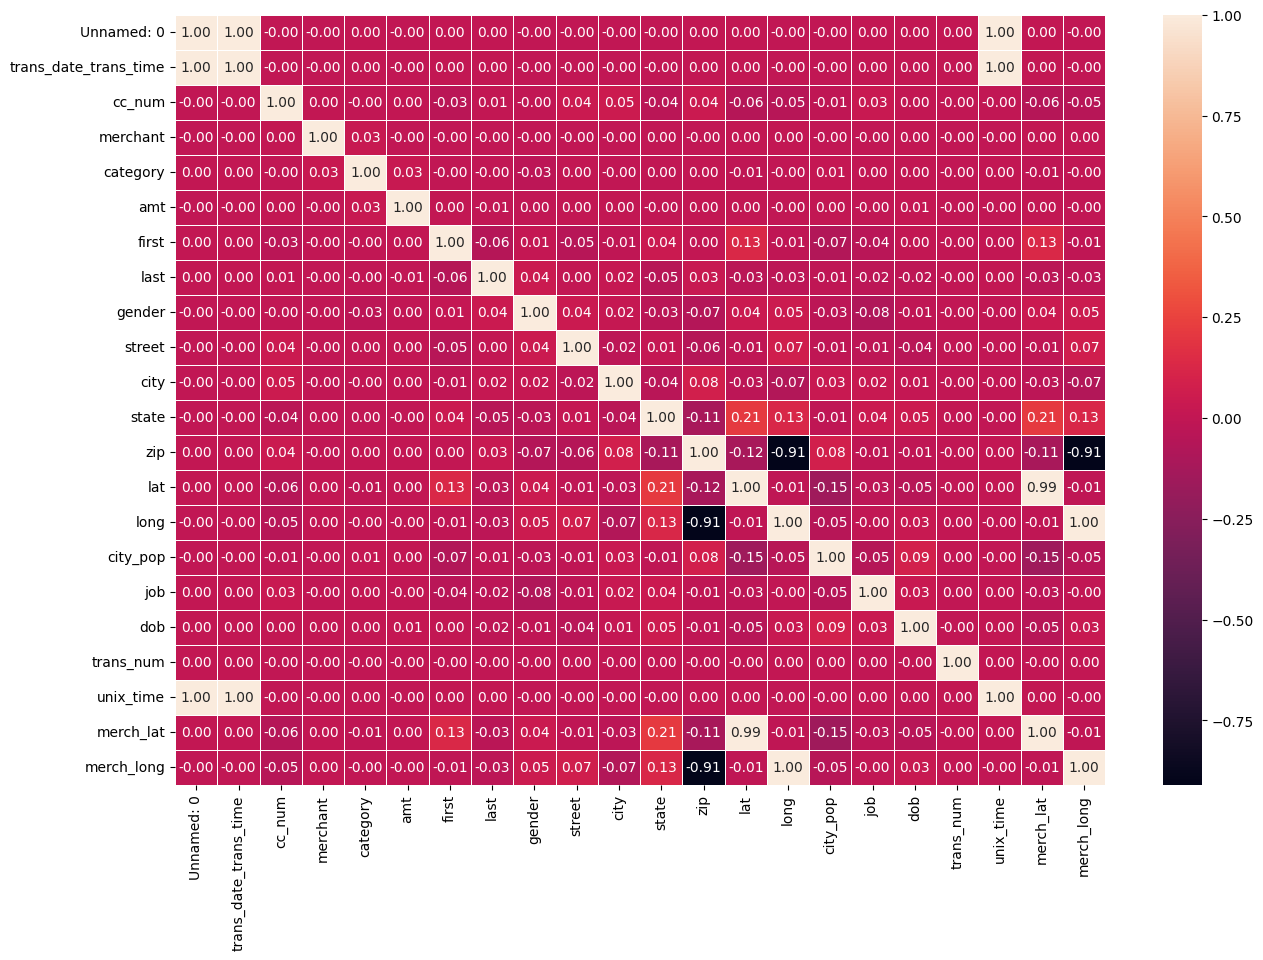

In [ ]:
# heatmap for the all the features
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

**Basically here we are splitting the data**

In [ ]:
# importing the train_test_split function to train and test data
from sklearn.model_selection import train_test_split

In [ ]:
# seperating the data into 70:30 ratio with random state=2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
X_train.shape

(389003, 22)

In [ ]:
X_test.shape

(166716, 22)

In [ ]:
Y_train.shape

(389003,)

In [ ]:
Y_test.shape

(166716,)

**Applying Logistic Regression**

In [ ]:
# importing and initialising Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [ ]:
# fitting the training data into Logistic Regression
logr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = logr.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# checking the training data score
logr.score(X_train, Y_train)

0.995861214437935

In [ ]:
# checking the testing data score
logr.score(X_test, Y_test)

0.9957532570359173

Here we can see that using Logistic Regression  our model score is 99.5%.

It concludes that our model is in the state of **proper fitting**.

**Applying Confusion Matrix**

In [ ]:
# importing confusion matrix for classification
from sklearn.metrics import confusion_matrix

In [ ]:
# evaluating the confusion matrix data
# here ravel function convert n-dimensional array into single dimension array
TP, FP, FN, TN = confusion_matrix(Y_test, Y_pred).ravel()

In [ ]:
print(f"True Positive: {TP}")
print(f"False Positive: {FP}")
print(f"False Negative: {FN}")
print(f"True Negative: {TN}")

True Positive: 166008
False Positive: 64
False Negative: 644
True Negative: 0


In [ ]:
# importing the recall_score, accuracy_score, precision_score and f1_score to check the scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# accuracy for the confusion_matrix
print(f"accuracy score is: {accuracy_score(Y_test, Y_pred)}")

# precision for the confusion_matrix
print(f"precision score is: {precision_score(Y_test, Y_pred)}")

# recall for the confusion_matrix
print(f"recall score is: {recall_score(Y_test, Y_pred)}")

# f1_score for the confusion_matrix
print(f"f1 score is: {f1_score(Y_test, Y_pred)}")

accuracy score is: 0.9957532570359173
precision score is: 0.0
recall score is: 0.0
f1 score is: 0.0


**Checking ROC Curve**

In [ ]:
# importing the roc_curve
from sklearn.metrics import roc_curve

In [ ]:
# false positive rate(fpr), true positive rate(tpr) and threshold
fpr, tpr, threshold = roc_curve(Y_test, Y_pred)

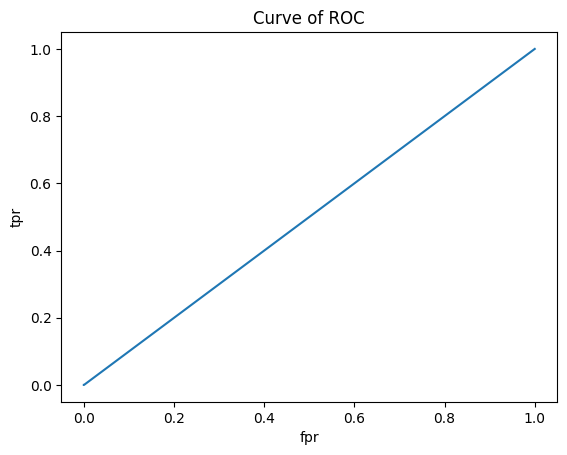

In [ ]:
# ploting the fpr v/s tpr graph
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curve of ROC')
plt.show()

**Area Under the Curve**

In [ ]:
# to calculate the area under the curve
from sklearn.metrics import roc_auc_score

In [ ]:
# area under the curve
auc_score = roc_auc_score(Y_test, Y_pred)
auc_score

0.49980731249096777

Conclusion ->

The **auc_score = 0.5** which infers that our model have no discriminative power and is performing as well as random guessing.

**Applying Decision Tree Classifier with gini criterion**

In [ ]:
# importing and initialising decision tree classifier with gini criteria and max depth=3
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
# fitting the training data into decision treee classifier
dtc1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# checking the training data score
dtc1.score(X_train, Y_train)

0.9961491299552959

In [ ]:
# checking the testing data score
dtc1.score(X_test, Y_test)

0.9961371434055519

Here both the training data and testing data are 99.61%.

Hence it is the case of **proper fitting**.

**Compairing Decision Tree Classifier with gini criterion and max_depth=3 with the Logistic Regression we can see that our model score has increased from 99.5% to 99.61%.**

**Applying Random Forest Classifier**

In [ ]:
# importing and initialising random forest classifier with
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=3)

In [ ]:
# fitting the training data into random forest classifier
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
# checking the training data score
rfc.score(X_train, Y_train)

0.9961645540008689

In [ ]:
# checking the testing data score
rfc.score(X_test, Y_test)

0.9961491398546031

Here both the training data and testing data are 99.61%.

Hence it is the case of **proper fitting**.

**Compairing Decision Tree Classifier with gini criterion and max_depth=3 with the Random Forest Classifier with n_estimators=100 we can see that our model score are same i.e. 99.61%.**

In [ ]:
Y_pred = rfc.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

**Classification Report**

In [ ]:
# learning the concept of Classification Report
from sklearn.metrics import classification_report

In [ ]:
# printing classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       1.00      0.00      0.01       644

    accuracy                           1.00    166716
   macro avg       1.00      0.50      0.50    166716
weighted avg       1.00      1.00      0.99    166716



The Classification report shows the accuracy, precision, f1-score for random forest classifier.

**Applying XGBoost**

In [ ]:
# importing and initialising XGBoost with random state=2
from xgboost import XGBClassifier
xgb = XGBClassifier(base_estimator=dtc1, random_state=2, learning_rate=0.1)

In [ ]:
# fitting the data into xg boost
xgb.fit(X_train, Y_train)

XGBClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
              base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# checking training data score
xgb.score(X_train, Y_train)

0.9988303432107207

In [ ]:
# checking testing data score
xgb.score(X_test, Y_test)

0.9984284651743084

Here both the training data and testing data are 99.8%.

Hence it is the case of **proper fitting**.

**Compairing Random Forest Classifier with the XG Boost we can see that our model score has increased from 99.61% to 99.8%.**